In [16]:
import networkx as nx
import csv
from scipy import stats
import copy

# collective shortest path

for direction in ["directed","undirected"]:
    for weighted in ["weighted", "unweighted"]:
        print(direction, weighted)
        concatenated_score_list = []
        concatenated_metric_list = []
        concatenated_student_list = []

        for file in ["spr21/spr21_formatted.csv","fall21/fall21_formatted.csv","spr22/spr22_formatted.csv","fall22/fall22_formatted.csv"]:

            student_scores = {}
            student_graphs = {}
            student_distance = {}
            student_statement_count = {}

            if direction == "directed":
                aggregate_graph = nx.DiGraph()
            elif direction == "undirected":
                aggregate_graph = nx.Graph()

            with open(file) as input:
                reader = csv.reader(input, delimiter="\t")
                next(reader)
                for line in reader:
                    
                    if line[0] not in student_graphs:
                        if direction == "undirected":
                            student_graphs[line[0]] = nx.Graph()
                        elif direction == "directed":
                            student_graphs[line[0]] = nx.DiGraph()
                            
                        student_scores[line[0]] = 0
                        student_statement_count[line[0]] = 0
                    student_statement_count[line[0]] += 1
                    student_scores[line[0]] += int(line[4])
                    student_graphs[line[0]].add_edge(line[1],line[3])
                    if aggregate_graph.has_edge(line[1], line[3]):
                        aggregate_graph[line[1]][line[3]]["weight"] += 1
                    else:
                        aggregate_graph.add_edge(line[1],line[3],weight=1)

            # get the longest shortest path in the graph
            edge_counts = nx.get_edge_attributes(aggregate_graph, "weight")
            sp = nx.all_pairs_shortest_path(aggregate_graph)
            longest_path = 0
            for path in sp:
                for subpath in path:
                    if type(subpath) is dict:
                        for _, path_list in subpath.items():
                            
                            if weighted == "unweighted":
                                if len(path_list) > longest_path:
                                    longest_path = len(path_list)
                            elif weighted == "weighted":
                                weighted_path = 0
                                for index, edge in enumerate(path_list):
                                    if index != 0:
                                        edge_tup = (path_list[index-1],edge)
                                        if edge_tup not in edge_counts:
                                            edge_tup = (edge_tup[1],edge_tup[0])
                                        weighted_path += edge_counts[edge_tup]   
                                if weighted_path > longest_path:
                                    longest_path = weighted_path

            for student in student_scores:
                student_scores[student] = student_scores[student]/student_statement_count[student]

            for student, student_graph in student_graphs.items():
                student_distance_score = 0
                personal_aggregate = copy.deepcopy(aggregate_graph)
                for edge in student_graph.edges:
                    if personal_aggregate[edge[0]][edge[1]]["weight"] == 1:
                        personal_aggregate.remove_edge(edge[0],edge[1])
                    else:
                        personal_aggregate[edge[0]][edge[1]]["weight"] -= 1
                for edge in student_graph.edges:
                    if nx.has_path(personal_aggregate,edge[0],edge[1]):
                        sp = nx.shortest_path(personal_aggregate,edge[0],edge[1])
                        
                        if weighted == "unweighted":
                            student_distance_score += len(sp)-1
                        elif weighted == "weighted":
                            for index, edge in enumerate(sp):
                                if index != 0:
                                    edge_tup = (sp[index-1],edge)
                                    if edge_tup not in edge_counts:
                                        edge_tup = (edge_tup[1],edge_tup[0])
                                    student_distance_score += edge_counts[edge_tup]
                    else:
                        student_distance_score += longest_path+1
                student_distance[student] = student_distance_score/len(student_graph.edges)

            score_list = []
            metric_list = []
            student_list = []
            for student in student_scores:
                score_list.append(student_scores[student])
                metric_list.append(student_distance[student])
                student_list.append(student)

            print(file)
            print(stats.pearsonr(score_list,metric_list))
            print(max(metric_list) - min(metric_list))

            for score in score_list:
                concatenated_score_list.append(score)
            for metric_value in metric_list:
                concatenated_metric_list.append(metric_value)
            for student in student_list:
                concatenated_student_list.append(student)

        mode = "combined"
        if len(score_list) != len(concatenated_score_list):
            mode = "concatenated"

        score_list = concatenated_score_list
        metric_list = concatenated_metric_list
        student_list = concatenated_student_list

        metric = f"node_distance_{mode}"

directed weighted
spr21/spr21_formatted.csv
(-0.27106397770208296, 0.0012483974567595807)
33.50769230769231
fall21/fall21_formatted.csv
(-0.3166551270248979, 2.988235490489304e-07)
49.9
spr22/spr22_formatted.csv
(-0.2254708275559549, 0.2581478277742227)
2.60934819897084
fall22/fall22_formatted.csv
(0.46885835095499007, 1.00469087484309e-15)
81.33333333333333
directed unweighted
spr21/spr21_formatted.csv
(-0.24995693663511878, 0.0030014184613073517)
9.53076923076923
fall21/fall21_formatted.csv
(-0.38568023619909625, 2.5115433568031607e-10)
12.9
spr22/spr22_formatted.csv
(-0.6481894550962298, 0.0002560588932713842)
1.3110788582486694
fall22/fall22_formatted.csv
(-0.16551763918055176, 0.007255790252276949)
0.11111111111111116
undirected weighted
spr21/spr21_formatted.csv
(-0.2390805500952731, 0.00458987995605594)
54.881520778072506
fall21/fall21_formatted.csv
(-0.305494420906022, 8.046023786398834e-07)
56.9
spr22/spr22_formatted.csv
(-0.2390558016220775, 0.22978986947913738)
3.40524193548

/Users/hayden.freedman/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [41]:
import networkx as nx
import csv
from scipy import stats

# weighted coverage

for direction in ["directed","undirected"]:
    concatenated_score_list = []
    concatenated_metric_list = []
    concatenated_student_list = []
    print(direction)
    for file in ["spr21/spr21_formatted.csv","fall21/fall21_formatted.csv","spr22/spr22_formatted.csv","fall22/fall22_formatted.csv"]:

        student_scores = {}
        student_graphs = {}
        student_coverage = {}
        student_statement_count = {}
        edge_count = {}

        with open(file) as input:
            reader = csv.reader(input, delimiter="\t")
            next(reader)
            for line in reader:
                if line[0] not in student_graphs:
                    if direction == "directed":
                        student_graphs[line[0]] = nx.DiGraph()
                    elif direction == "undirected":
                        student_graphs[line[0]] = nx.Graph()
                    student_scores[line[0]] = 0
                    student_statement_count[line[0]] = 0
                student_statement_count[line[0]] += 1
                student_scores[line[0]] += int(line[4])
                student_graphs[line[0]].add_edge(line[1],line[3])

                if direction == "undirected":
                    sorted_arr = sorted([line[1],line[3]])
                    if tuple(sorted_arr) not in edge_count:
                        edge_count[tuple(sorted_arr)] = 0
                    edge_count[tuple(sorted_arr)] += 1

                elif direction == "directed":
                    if (line[1],line[3]) not in edge_count:
                        edge_count[(line[1],line[3])] = 0
                    edge_count[(line[1],line[3])] += 1

        if direction == "directed":
            aggregate_graph = nx.DiGraph()
        elif direction == "undirected":
            aggregate_graph = nx.Graph()
            
        for edge, count in edge_count.items():
            aggregate_graph.add_edge(edge[0],edge[1])

        for student in student_scores:
            student_scores[student] = student_scores[student]/student_statement_count[student]

        for student, student_graph in student_graphs.items():
            subgraph = aggregate_graph.subgraph(student_graph.nodes)
            student_edge_sum = 0
            subgraph_edge_sum = 0
            for edge in subgraph.edges:

                if direction == "undirected":
                    count = edge_count[tuple(sorted([edge[0],edge[1]]))]
                elif direction == "directed":
                    count = edge_count[edge]

                subgraph_edge_sum += count
                if edge in student_graph.edges:
                    student_edge_sum += count
            student_coverage[student] = (subgraph_edge_sum-student_edge_sum)/len(student_graph.edges)

        score_list = []
        metric_list = []
        student_list = []
        for student in student_scores:
            score_list.append(student_scores[student])
            metric_list.append(student_coverage[student])
            student_list.append(student)

        print(file)
        print(stats.pearsonr(score_list,metric_list))

        for score in score_list:
            concatenated_score_list.append(score)
        for metric_value in metric_list:
            concatenated_metric_list.append(metric_value)
        for student in student_list:
            concatenated_student_list.append(student)

    mode = "combined"
    if len(score_list) != len(concatenated_score_list):
        mode = "concatenated"

    score_list = concatenated_score_list
    metric_list = concatenated_metric_list
    student_list = concatenated_student_list

    metric = f"coverage_{mode}"

directed
spr21/spr21_formatted.csv
(0.21461934355592896, 0.01117713514816049)
fall21/fall21_formatted.csv
(0.21437101049997348, 0.0006281526421433391)
spr22/spr22_formatted.csv
(0.1521307619723745, 0.44874134731157095)
fall22/fall22_formatted.csv
(0.015089802103112358, 0.8079312257071796)
undirected
spr21/spr21_formatted.csv
(0.23851252512185195, 0.004690499181160832)
fall21/fall21_formatted.csv
(0.20535041730312092, 0.0010676550472782404)
spr22/spr22_formatted.csv
(0.1967006951982024, 0.32542326359014784)
fall22/fall22_formatted.csv
(0.06876215337733367, 0.2674284770456287)


In [15]:
import networkx as nx
import csv
from scipy import stats

# unweighted coverage

for direction in ["directed","undirected"]:
    concatenated_score_list = []
    concatenated_metric_list = []
    concatenated_student_list = []
    print(direction)
    for file in ["spr21/spr21_formatted.csv","fall21/fall21_formatted.csv","spr22/spr22_formatted.csv","fall22/fall22_formatted.csv"]:

        student_scores = {}
        student_graphs = {}
        student_coverage = {}
        student_statement_count = {}

        if direction == "directed":
            aggregate_graph = nx.DiGraph()
        elif direction == "undirected":
            aggregate_graph = nx.Graph()

        with open(file) as input:
            reader = csv.reader(input, delimiter="\t")
            next(reader)
            for line in reader:
                if line[0] not in student_graphs:
                    if direction == "directed":
                        student_graphs[line[0]] = nx.DiGraph()
                    elif direction == "undirected":
                        student_graphs[line[0]] = nx.Graph()
                    student_scores[line[0]] = 0
                    student_statement_count[line[0]] = 0
                student_statement_count[line[0]] += 1
                student_scores[line[0]] += int(line[4])
                student_graphs[line[0]].add_edge(line[1],line[3])
                aggregate_graph.add_edge(line[1],line[3])

        for student in student_scores:
            student_scores[student] = student_scores[student]/student_statement_count[student]

        for student, student_graph in student_graphs.items():
            subgraph = aggregate_graph.subgraph(student_graph.nodes)
            student_coverage[student] = (len(subgraph.edges)-len(student_graph.edges))/len(student_graph.edges)

        score_list = []
        metric_list = []
        student_list = []
        for student in student_scores:
            score_list.append(student_scores[student])
            metric_list.append(student_coverage[student])
            student_list.append(student)

        print(file)
        print(stats.pearsonr(score_list,metric_list))
        print(max(metric_list) - min(metric_list))

        for score in score_list:
            concatenated_score_list.append(score)
        for metric_value in metric_list:
            concatenated_metric_list.append(metric_value)
        for student in student_list:
            concatenated_student_list.append(student)

    mode = "combined"
    if len(score_list) != len(concatenated_score_list):
        mode = "concatenated"

    score_list = concatenated_score_list
    metric_list = concatenated_metric_list
    student_list = concatenated_student_list

    metric = f"coverage_{mode}"

directed
spr21/spr21_formatted.csv
(0.3519287678777338, 2.1526871306284945e-05)
3.7559966914805627
fall21/fall21_formatted.csv
(0.24053820217263838, 0.00011885525299147896)
2.3333333333333335
spr22/spr22_formatted.csv
(0.2856999163369849, 0.1485689183736012)
3.9720279720279725
fall22/fall22_formatted.csv
(0.1265515514573499, 0.040672047061709016)
7.666666666666666
undirected
spr21/spr21_formatted.csv
(0.37940576653250896, 4.10182816209734e-06)
2.687782805429864
fall21/fall21_formatted.csv
(0.2106084119050831, 0.0007857970488232262)
1.5555555555555556
spr22/spr22_formatted.csv
(0.3195973445865147, 0.10415389623499481)
3.590909090909091
fall22/fall22_formatted.csv
(0.13160667408807897, 0.03322742221855065)
4.0


In [11]:
import networkx as nx
import csv

# edge consensus

concatenated_score_list = []
concatenated_metric_list = []
concatenated_student_list = []

for file in ["spr21/spr21_formatted.csv","fall21/fall21_formatted.csv","spr22/spr22_formatted.csv","fall22/fall22_formatted.csv"]:
    
    student_scores = {}
    student_consensus = {}
    student_graphs = {}
    student_statement_count = {}

    with open(file) as input:
        reader = csv.reader(input, delimiter="\t")
        next(reader)
        for line in reader:
            if line[0] not in student_graphs:
                student_graphs[line[0]] = nx.DiGraph()
                #student_graphs[line[0]] = nx.Graph()
                student_scores[line[0]] = 0
                student_statement_count[line[0]] = 0
            student_statement_count[line[0]] += 1
            student_scores[line[0]] += int(line[4])
            student_graphs[line[0]].add_edge(line[1],line[3])

    for student in student_scores:
        student_scores[student] = student_scores[student]/student_statement_count[student]

    for student, graph in student_graphs.items():
        consensus_score = 0
        for edge in graph.edges:
            for student2, graph in student_graphs.items():
                if student != student2:
                    for edge2 in graph.edges:
                        if edge == edge2:
                            consensus_score += 1
                        elif (edge[1],edge[0]) == edge2:
                            consensus_score += 1
        student_consensus[student] = consensus_score/len(graph)

    score_list = []
    metric_list = []
    student_list = []
    for student, nodes in student_graphs.items():
        score_list.append(student_scores[student])
        metric_list.append(student_consensus[student])
        student_list.append(student)

    print(file)
    print(stats.pearsonr(score_list,metric_list))
    print(max(metric_list) - min(metric_list))
    
    for score in score_list:
        concatenated_score_list.append(score)
    for metric_value in metric_list:
        concatenated_metric_list.append(metric_value)
    for student in student_list:
        concatenated_student_list.append(student)
    
mode = "combined"
if len(score_list) != len(concatenated_score_list):
    mode = "concatenated"
    
score_list = concatenated_score_list
metric_list = concatenated_metric_list
student_list = concatenated_student_list

metric = f"consensus_{mode}"

spr21/spr21_formatted.csv
(0.17319862000726333, 0.04145217095281538)
7.827586206896551
fall21/fall21_formatted.csv
(0.4221046310220617, 2.8876395232437002e-12)
11.1
spr22/spr22_formatted.csv
(0.37840776021708644, 0.05161948021733306)
5.071428571428571
fall22/fall22_formatted.csv
(0.32804193626065203, 5.4615531372896504e-08)
1136.5


In [35]:
import networkx as nx
import csv
from scipy import stats

# unweighted edge betweenness centrality

for file in ["spr21/spr21_formatted.csv","fall21/fall21_formatted.csv","spr22/spr22_formatted.csv","fall22/fall22_formatted.csv"]:

    student_edges = {}
    student_scores = {}
    student_statement_count = {}

    #G = nx.DiGraph()
    G = nx.Graph()
    with open(file) as input:
        reader = csv.reader(input, delimiter="\t")
        next(reader)
        for line in reader:
            if line[0] not in student_edges:
                student_edges[line[0]] = set()
                student_scores[line[0]] = 0
                student_statement_count[line[0]] = 0
            student_statement_count[line[0]] += 1
            student_edges[line[0]].add((line[1],line[3]))
            student_scores[line[0]] += int(line[4])
            G.add_edge(line[1],line[3])

    for student in student_scores:
        student_scores[student] = student_scores[student]/student_statement_count[student]

    metric = nx.edge_betweenness_centrality(G)

    score_list = []
    metric_list = []
    for student, edges in student_edges.items():
        student_metric = 0
        score_list.append(student_scores[student])
        for edge in edges:
            this_edge = edge
            if this_edge not in metric:
                this_edge = (edge[1],edge[0])
            student_metric += metric[this_edge]
        student_metric = student_metric/len(edges)
        metric_list.append(student_metric)

    print(file)
    print(stats.pearsonr(score_list,metric_list))

spr21/spr21_formatted.csv
(-0.0412846176077302, 0.6294160549637374)
fall21/fall21_formatted.csv
(0.1308473726457744, 0.03830469190345855)
spr22/spr22_formatted.csv
(-0.3393615031017094, 0.08331818697063156)
fall22/fall22_formatted.csv
(-0.04439965851570643, 0.4742458422481184)


/Users/hayden.freedman/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4098: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [37]:
import networkx as nx
import csv
from scipy import stats

# weighted edge betweenness centrality

concatenated_score_list = []
concatenated_metric_list = []
concatenated_student_list = []

for file in ["spr21/spr21_formatted.csv","fall21/fall21_formatted.csv","spr22/spr22_formatted.csv","fall22/fall22_formatted.csv"]:

    student_edges = {}
    student_scores = {}
    edge_count = {}
    student_statement_count = {}

    with open(file) as input:
        reader = csv.reader(input, delimiter="\t")
        next(reader)
        for line in reader:
            if line[0] not in student_edges:
                student_edges[line[0]] = set()
                student_scores[line[0]] = 0
                student_statement_count[line[0]] = 0
            student_edges[line[0]].add((line[1],line[3]))
            student_scores[line[0]] += int(line[4])
            student_statement_count[line[0]] += 1
            if (line[1],line[3]) not in edge_count:
                edge_count[(line[1],line[3])] = 0
            edge_count[(line[1],line[3])] += 1

    for student in student_scores:
        student_scores[student] = student_scores[student]/student_statement_count[student]

    G = nx.Graph()
    #G = nx.DiGraph()
    for edge,count in edge_count.items():
        G.add_edge(edge[0],edge[1],weight=count)

    metric = nx.edge_betweenness_centrality(G,weight="weight")

    score_list = []
    metric_list = []
    student_list = []
    for student, edges in student_edges.items():
        student_metric = 0
        score_list.append(student_scores[student])
        for edge in edges:
            tup = (edge[0],edge[1])
            if tup not in metric:
                tup = (edge[1],edge[0])
            student_metric += metric[tup]
        student_metric = student_metric/len(edges)
        metric_list.append(student_metric)
        student_list.append(student)
        
    print(file)
    print(stats.pearsonr(score_list,metric_list))
    
    for score in score_list:
        concatenated_score_list.append(score)
    for metric_value in metric_list:
        concatenated_metric_list.append(metric_value)
    for student in student_list:
        concatenated_student_list.append(student)

mode = "combined"
if len(score_list) != len(concatenated_score_list):
    mode = "concatenated"
    
score_list = concatenated_score_list
metric_list = concatenated_metric_list
student_list = concatenated_student_list

metric = f"unimodal_concept_weighted_edge_betweenness_centrality_{mode}"

spr21/spr21_formatted.csv
(-0.08785133525090191, 0.30376698881467906)
fall21/fall21_formatted.csv
(0.049272518352122985, 0.43704125452678455)
spr22/spr22_formatted.csv
(-0.5596126922981186, 0.0024049607855594966)
fall22/fall22_formatted.csv
(0.07381268727486662, 0.23378125324735224)


In [33]:
import networkx as nx
import csv
from scipy import stats

# weighted node centrality

for file in ["spr21/spr21_formatted.csv","fall21/fall21_formatted.csv","spr22/spr22_formatted.csv","fall22/fall22_formatted.csv"]:

    student_nodes = {}
    student_scores = {}
    edge_count = {}
    student_statement_count = {}
    
    omit_nodes = ["sustainability","technology"]

    with open(file) as input:
        reader = csv.reader(input, delimiter="\t")
        next(reader)
        for line in reader:
            if line[0] not in student_nodes:
                student_nodes[line[0]] = set()
                student_scores[line[0]] = 0
                student_statement_count[line[0]] = 0
            # remove required nodes
            #if line[1].lower() not in omit_nodes and line[3].lower() not in omit_nodes:
            student_nodes[line[0]].add(line[1])
            student_nodes[line[0]].add(line[3])
            student_scores[line[0]] += int(line[4])
            student_statement_count[line[0]] += 1
            if (line[1],line[3]) not in edge_count:
                edge_count[(line[1],line[3])] = 0
            edge_count[(line[1],line[3])] += 1

    for student in student_scores:
        student_scores[student] = student_scores[student]/student_statement_count[student]

    #G = nx.DiGraph()
    G = nx.Graph()
    for edge,count in edge_count.items():
        G.add_edge(edge[0],edge[1],weight=count)
        
    #metric = "betweenness"
    metric = "closeness"
    #metric = "degree"

    if metric == "betweenness":
        metric_data = nx.betweenness_centrality(G,weight="weight")
    elif metric == "closeness":
        metric_data = nx.closeness_centrality(G,distance="weight")
    elif metric == "degree":
        metric_data = nx.degree_centrality(G,weight="weight")

    student_list = []
    score_list = []
    metric_list = []
    for student, nodes in student_nodes.items():
        student_metric = 0
        score_list.append(student_scores[student])
        for node in nodes:
            student_metric += metric_data[node]
        student_metric = student_metric/len(nodes)
        metric_list.append(student_metric)
        student_list.append(student)
        
    print(file)
    print(stats.pearsonr(score_list,metric_list))

spr21/spr21_formatted.csv
(-0.04117433547141215, 0.6303325689918198)
fall21/fall21_formatted.csv
(0.19505974762663053, 0.001904208593929144)
spr22/spr22_formatted.csv
(0.036685471481513354, 0.8558463711478648)
fall22/fall22_formatted.csv
(0.19728373349093145, 0.001328966028421246)


In [14]:
import networkx as nx
import csv
from scipy import stats

# unweighted node centrality

concatenated_score_list = []
concatenated_metric_list = []
concatenated_student_list = []

for file in ["spr21/spr21_formatted.csv","fall21/fall21_formatted.csv","spr22/spr22_formatted.csv","fall22/fall22_formatted.csv"]:
    
    omit_nodes = ["sustainability","technology"]
    
    student_nodes = {}
    student_scores = {}
    student_statement_count = {}

    G = nx.DiGraph()
    #G = nx.Graph()

    with open(file) as input:
        reader = csv.reader(input, delimiter="\t")
        next(reader)
        for line in reader:
            if line[0] not in student_nodes:
                student_nodes[line[0]] = set()
                student_scores[line[0]] = 0
                student_statement_count[line[0]] = 0
            if line[1].lower() not in omit_nodes and line[3].lower() not in omit_nodes:
                student_nodes[line[0]].add(line[1])
                student_nodes[line[0]].add(line[3])
                student_scores[line[0]] += int(line[4])
                student_statement_count[line[0]] += 1
                G.add_edge(line[1],line[3])
        
    for student in student_scores:
        student_scores[student] = student_scores[student]/student_statement_count[student]

    #metric = "betweenness"
    #metric = "closeness"
    metric = "degree"

    if metric == "betweenness":
        metric_data = nx.betweenness_centrality(G)
    elif metric == "closeness":
        metric_data = nx.closeness_centrality(G)
    elif metric == "degree":
        metric_data = nx.degree_centrality(G)

    score_list = []
    metric_list = []
    student_list = []
    for student, nodes in student_nodes.items():
        student_metric = 0
        score_list.append(student_scores[student])
        for node in nodes:
            student_metric += metric_data[node]
        student_metric = student_metric/len(nodes)
        metric_list.append(student_metric)
        student_list.append(student)

    print(file)
    print(stats.pearsonr(score_list,metric_list))
    print(max(metric_list) - min(metric_list))
             
    for score in score_list:
        concatenated_score_list.append(score)
    for metric_value in metric_list:
        concatenated_metric_list.append(metric_value)
    for student in student_list:
        concatenated_student_list.append(student)

mode = "combined"
if len(score_list) != len(concatenated_score_list):
    mode = "concatenated"
    
score_list = concatenated_score_list
metric_list = concatenated_metric_list
student_list = concatenated_student_list

metric = f"unimodal_concept_unweighted_{metric}_centrality_{mode}"

spr21/spr21_formatted.csv
(0.18402115161615304, 0.030117607938103655)
0.04368039368039369
fall21/fall21_formatted.csv
(0.38201316003885977, 3.823026935339475e-10)
0.08175105485232068
spr22/spr22_formatted.csv
(0.02519622469528904, 0.9007232201025961)
0.07828947368421052
fall22/fall22_formatted.csv
(-0.09534991186215477, 0.1236815223639441)
0.0462962962962965


In [7]:
import networkx as nx
import csv
from scipy import stats
import statistics

# unweighted aspl/clustering/density

for file in ["spr21/spr21_formatted.csv","fall21/fall21_formatted.csv","spr22/spr22_formatted.csv","fall22/fall22_formatted.csv"]:
    student_scores = {}
    student_graphs = {}
    student_statement_count = {}

    with open(file) as input:
        reader = csv.reader(input, delimiter="\t")
        next(reader)
        for line in reader:
            if line[0] not in student_graphs:
                student_graphs[line[0]] = nx.DiGraph()
                student_scores[line[0]] = 0
                student_statement_count[line[0]] = 0
            student_statement_count[line[0]] += 1
            student_scores[line[0]] += int(line[4])
            student_graphs[line[0]].add_edge(line[1],line[3])

    for student in student_scores:
        student_scores[student] = student_scores[student]/student_statement_count[student]

    #metric = "aspl"
    metric = "clustering"
    #metric = "density"
    #metric = "num_nodes"

    score_list = []
    metric_list = []
    student_list = []
    
    for student, nodes in student_graphs.items():
        if metric == "aspl":
            if nx.is_weakly_connected(student_graphs[student]):
                score_list.append(student_scores[student])
                metric_list.append(nx.average_shortest_path_length(student_graphs[student]))
                student_list.append(student)
        elif metric == "clustering":
            score_list.append(student_scores[student])
            metric_list.append(nx.average_clustering(student_graphs[student]))
            student_list.append(student)
        elif metric == "density":
            score_list.append(student_scores[student])
            metric_list.append(nx.density(student_graphs[student]))
            student_list.append(student)
        elif metric == "num_nodes":
            score_list.append(student_scores[student])
            metric_list.append(len(nodes))
            student_list.append(student)

    print(file)
    print(stats.pearsonr(score_list,metric_list))
    print(max(metric_list) - min(metric_list))

spr21/spr21_formatted.csv
(-0.23998293024393183, 0.004434004550951446)
0.3248015873015873
fall21/fall21_formatted.csv
(-0.11750665532600248, 0.06305439708521594)
0.35
spr22/spr22_formatted.csv
(-0.08348126508877406, 0.678889224210298)
0.2015589569160998
fall22/fall22_formatted.csv
(0.0995200802212437, 0.10801859413762134)
0.45886243386243386


In [2]:
import csv

# spring 2021 formatting

statement_scores = {}

with open('spr21/wikidata_review-wikidata_review_edited.csv') as review:
    reader = csv.reader(review)
    for line in reader:
        if line[4] == "X":
            statement_scores[(line[0].lower(),line[1].lower(),line[2].lower())] = 0
        else:
            statement_scores[(line[0].lower(),line[1].lower(),line[2].lower())] = 1

lines = []
with open('spr21/cmap2rdf/outputs/output_kg3_irb.nq') as file:
    reader = csv.reader(file, delimiter=" ")
    for line in reader:
        student = line[3].replace("<http://sustainkg.org/","").split("_")[0]
        tuple_key = (line[0].replace("<https://en.wikipedia.org/wiki/","").replace(">","").replace(",","").lower(),
              line[1].replace("<http://sustainkg.org/","").replace(">","").lower(),
              line[2].replace("<https://en.wikipedia.org/wiki/","").replace(">","").replace(",","").lower())
        if tuple_key in statement_scores:
            score = statement_scores[tuple_key]
            lines.append([student,tuple_key[0],tuple_key[1],tuple_key[2],score])

with open("spr21/spr21_formatted.csv", "w") as write:
    writer = csv.writer(write, delimiter="\t")
    writer.writerow(["student","subject","predicate","object","score"])
    for line in lines:
        writer.writerow(line)

In [4]:
import csv

# fall 2021 formatting

statement_scores = {}

with open("fall21/CM1_grading_sheet.csv") as review:
    reader = csv.reader(review)
    next(reader)
    for line in reader:
        statement_scores[(line[2].lower(),"causes",line[3].lower())] = line[5]

lines = []
with open('fall21/data/cm1_snapshot_next_day_irb.nq') as file:
    reader = csv.reader(file, delimiter=" ")
    for line in reader:
        student = line[3].replace("<http://sustainkg.org/","").replace(">","").split("_")[0]
        tuple_key = (line[0].replace("<https://en.wikipedia.org/wiki/","").replace(">","").replace(",","").lower(),
              "causes",
              line[2].replace("<https://en.wikipedia.org/wiki/","").replace(">","").replace(",","").lower())
        if tuple_key in statement_scores:
            score = statement_scores[tuple_key]
            lines.append([student,tuple_key[0],tuple_key[1],tuple_key[2],score])

with open("fall21/fall21_formatted.csv", "w") as write:
    writer = csv.writer(write, delimiter="\t")
    writer.writerow(["student","subject","predicate","object","score"])
    for line in lines:
        writer.writerow(line)

In [9]:
import csv

# fall 2022 formatting

lines = []
nodeset = ['societal_collapse', 'climate_change', 'energy', 'well-being', 'environmental_degradation', 'information_technology', 'sustainable_development', 'animal_welfare', 'biodiversity_loss', 'human_behavior']

with open("fall22/concept_map_1_GradingRound.csv") as review:
    reader = csv.reader(review)
    next(reader)
    for line in reader:
        if line[1].lower() in nodeset and line[3].lower() in nodeset:
            lines.append([line[0],line[1].lower(),line[2].lower(),line[3].lower(),line[5]])

with open("fall22/fall22_formatted.csv", "w") as write:
    writer = csv.writer(write, delimiter="\t")
    writer.writerow(["student","subject","predicate","object","score"])
    for line in lines:
        writer.writerow(line)

In [1]:
import csv

# spring 2022 formatting

instructor_nodes = set()
instructor_statements = set()
student_statements = {}

with open("spr22/revised_instructor_graph.csv") as instructor_file:
    reader = csv.reader(instructor_file)
    next(reader)
    for line in reader:
        #instructor_statements.add((line[0],line[1],line[2]))
        instructor_statements.add((line[0],line[2]))
        instructor_nodes.add(line[0])
        instructor_nodes.add(line[2])

with open("spr22/student_statements.tsv") as student_file:
    reader = csv.reader(student_file, delimiter="\t")
    next(reader)
    for line in reader:
        student = line[0]
        if student not in student_statements:
            student_statements[student] = set()
        #student_statements[student].add((line[1],line[2],line[3]))
        student_statements[student].add((line[1],line[3]))

with open("spr22/spr22_formatted_nodes_only.csv", "w") as write:
    writer = csv.writer(write, delimiter="\t")
    writer.writerow(["student","subject","predicate","object","score"])
    for student, statements in student_statements.items():
        for statement in statements:
            #if statement[0] in instructor_nodes and statement[2] in instructor_nodes:
            if statement[0] in instructor_nodes and statement[1] in instructor_nodes:
                statement_score = 0
                if statement in instructor_statements:
                    statement_score = 1
                #writer.writerow([student, statement[0], statement[1], statement[2],  statement_score])
                writer.writerow([student, statement[0], "NA", statement[1],  statement_score])
                
        

(array([153.,  73.,  15.,  11.,   0.,   0.,   1.,   0.,   0.,   2.]),
 array([0.12222222, 0.61      , 1.09777778, 1.58555556, 2.07333333,
        2.56111111, 3.04888889, 3.53666667, 4.02444444, 4.51222222,
        5.        ]),
 <BarContainer object of 10 artists>)

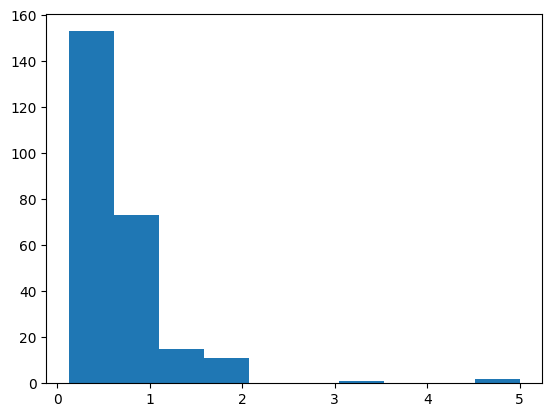

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# color_options = ["b","g","r","y"]
# colors = {}
# files = ["spr21/spr21_formatted.csv","fall21/fall21_formatted.csv","spr22/spr22_formatted.csv","fall22/fall22_formatted.csv"]
# student_files = {}
# for index, file in enumerate(files):
#     if file not in colors:
#         colors[file] = color_options[index]
#     with open(file) as input:
#         reader = csv.reader(input, delimiter="\t")
#         next(reader)
#         for line in reader:
#             student_files[line[0]] = file
            
min = 999
max = 0
for value in metric_list:
    if value > max:
        max = value
    if value < min:
        min = value

# node_colors = []
# for student in student_list:
#     node_colors.append(colors[student_files[student]])
    
# plot stuff
plt.hist(metric_list)
# fig, ax = plt.subplots(figsize = (7, 7))
# scatter = ax.scatter(metric_list,score_list)
# b, a = np.polyfit(metric_list,score_list,deg=1)
# print(b)
# xseq = np.linspace(min, max, num=100)
# ax.plot(xseq, a + b * xseq, color="k", lw=2.5);
# spr21 = mpatches.Patch(color='b', label="Spring '21")
# fall21 = mpatches.Patch(color='g', label="Fall '21")
# spr22 = mpatches.Patch(color='r', label="Spring '22")
# fall22 = mpatches.Patch(color='y', label="Fall '22")
# ax.legend(handles=[spr21, fall21, spr22, fall22])
# plt.savefig(f'figures/{metric}.png')

In [1]:
# p-value correction for family-wise error

from statsmodels.stats.multitest import multipletests
import csv

pvalues = []

with open("individual.csv") as individual:
    reader = csv.reader(individual)
    next(reader)
    for line in reader:
        for cell in line[1:]:
            pvalues.append(float(cell.split("=")[1].replace(" ","")))
with open("centrality.csv") as individual:
    reader = csv.reader(individual)
    next(reader)
    for line in reader:
        for cell in line[1:]:
            if cell != "N/A":
                pvalues.append(float(cell.split("=")[1].replace(" ","")))
with open("consensus.csv") as individual:
    reader = csv.reader(individual)
    next(reader)
    for line in reader:
        for cell in line[1:]:
            if cell != "N/A":
                pvalues.append(float(cell.split("=")[1].replace(" ","")))
                
print(pvalues)
corrected = multipletests(pvalues)
print(corrected)

[0.0035, 0.0044, 1e-05, 0.2441, 0.0631, 0.0703, 1e-05, 0.108, 7e-05, 0.2355, 0.0943, 0.0301, 0.0031, 0.2278, 0.0283, 0.0062, 0.0544, 0.6294, 0.0226, 0.2324, 0.0459, 0.3034, 0.3688, 0.0004, 0.0443, 1e-05, 0.0085, 0.0006, 2e-05, 0.06, 0.001, 0.0383, 5e-06, 7e-05, 0.0002, 0.437, 0.0019, 0.4687, 0.0022, 0.1237, 8e-05, 0.2125, 0.0007, 1e-06, 0.4742, 0.6725, 0.2334, 0.0013, 2e-05, 0.003, 0.0415, 0.0111, 0.0012, 4e-06, 0.0091, 0.0193, 0.0047, 0.0046, 0.0001, 3e-10, 3e-12, 0.0006, 3e-07, 0.0008, 3e-09, 3e-12, 0.0011, 8e-07, 0.0407, 0.007, 5e-08, 0.8079, 1e-15, 0.0332, 2e-08, 0.2674, 1e-07]
(array([False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False,  True, False, False, False, Fals